In [1]:
import pandas as pd

import sklearn


In [4]:
df_boston = pd.read_csv('Boston+House+Prices.csv')
# habitaciones por casa | distancia media de la casa a 5 centros de trabajo | valor en miles $ de la casa

In [5]:
df_boston.describe()

,Rooms,Distance,Value
count,506.000000,506.000000,506.000000
mean,6.284634,3.795043,22.532806
std,0.702617,2.105710,9.197104
min,3.561000,1.129600,5.000000
25%,5.885500,2.100175,17.025000
50%,6.208500,3.207450,21.200000
75%,6.623500,5.188425,25.000000
max,8.780000,12.126500,50.000000


# Lineal regression with Statsmodels

In [6]:
import statsmodels.api as sm

## Simple linear Regression + seaborn

### Defining depend and independent variables

In [7]:
y = df_boston['Value']
x = df_boston['Rooms']

### Dataset exploring

<AxesSubplot:xlabel='Rooms', ylabel='Value'>

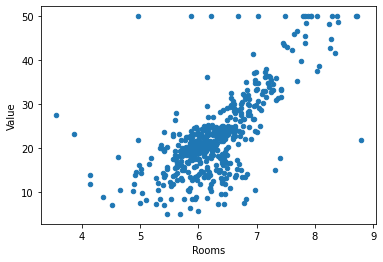

In [10]:
df_boston.plot(kind='scatter',
               x='Rooms',
               y='Value')

### Creating regression: adding constant and model adjustment

In [ ]:
# statsmodels no agrega la constante Bo por defecto, por lo que debemos agregarla manualmente usando la variable indepent
x = sm.add_constant(x)

In [11]:
# el ajuste del modelo es fundamental y de un buen ajuste depende la precisión de la predicción
x = sm.add_constant(x)
lm = sm.OLS(y, x).fit()

In [12]:
lm.predict(x)

0      25.175746
1      23.774021
2      30.728032
3      29.025938
4      30.382152
         ...    
501    25.339584
502    21.034286
503    28.825691
504    27.169108
505    20.215096
Length: 506, dtype: float64

In [13]:
# a continuacion evaluamos el rendimiento del modelo
# para ello usamos la tabla de regresion con todos sus resultados, que nos permite obtener idea de dicho rendimiento
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 24 Nov 2022   Prob (F-statistic):           2.49e-74
Time:                        17:01:16   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
Rooms          9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Vamos a analizar algunas métricas importantes ofrecidos por el modelo
el metodo utilizado: mínimos cuadrados
Dep.variable > indica la variable dependiente
Rsquare > si el valor es 0, entonces no explica el modelo nada de la variabilidad
        > si el valor es 1, entonces el modelo explica perfectamente la variabilidad
coef de correlación > los usaremos para crear la ecuación linear de mejor ajuste
std err > la desviación estandar > cuando mas pequeño, mejor será la predicción


### Linear Regression ecuation

In [14]:
# Coef Rooms: 9.1021
# Coef Constant: -34.6706
# Ecuación lineal: y = ax + b

y_pred = 9.1021*x['Rooms'] - 34.6706


In [15]:
# Para representar el grafico de dispersion junto con la linea de regresión
    # utilizaremos la libreria Seaborn y matplotlib
    
import seaborn as sns
import matplotlib.pyplot as plt


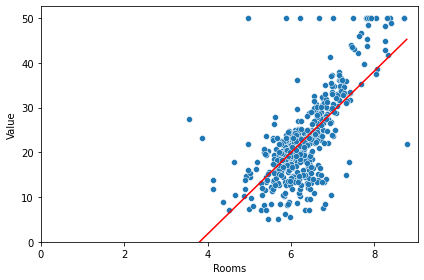

In [16]:
# represtando los puntos
plt.figure(figsize=(6, 4), tight_layout=True)
sns.scatterplot(x=x['Rooms'], y=y)

# representando la linea
sns.lineplot(x=x['Rooms'], y=y_pred, color='red')

# axis
plt.xlim(0)
plt.ylim(0)
plt.savefig('linear_regression')
plt.show()


# Multiple Linear regression con Statsmodel

In [17]:
df_boston

,Rooms,Distance,Value
0,6.575,4.0900,24.0
1,6.421,4.9671,21.6
2,7.185,4.9671,34.7
3,6.998,6.0622,33.4
4,7.147,6.0622,36.2
...,...,...,...
501,6.593,2.4786,22.4
502,6.120,2.2875,20.6
503,6.976,2.1675,23.9
504,6.794,2.3889,22.0


## Defining dependent and independent variables

In [19]:
# dependent
y = df_boston['Value']
# independent
X = df_boston[['Rooms', 'Distance']]

## Creating regression: adding constant  and model adjustment

In [20]:
X = sm.add_constant(X)
lm = sm.OLS(y, X).fit()

In [21]:
# a continuacion evaluamos el rendimiento del modelo
# para ello usamos la tabla de regresion con todos sus resultados, que nos permite obtener idea de dicho rendimiento
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     247.0
Date:                Thu, 24 Nov 2022   Prob (F-statistic):           1.84e-75
Time:                        18:42:32   Log-Likelihood:                -1667.1
No. Observations:                 506   AIC:                             3340.
Df Residuals:                     503   BIC:                             3353.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6361      2.621    -13.212      0.000     -39.786     -29.486
Rooms          8.8014      0.424     20.780      0.000       7.969       9.634
Distance       0.4888      0.141      3.459      0.001       0.211       0.767
==============================================================================
Omnibus:                      142.807   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              844.520
Skew:                           1.090   Prob(JB):                    4.12e-184
Kurtosis:                       8.942   Cond. No.                         68.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Linear regression with sklearn

In [22]:
from sklearn import linear_model

## Defining depedent independent variables

In [23]:
y = df_boston['Value']
X = df_boston[['Rooms', 'Distance']]

## Model adjustment

In [24]:
# sklearn añade la constante por defecto, por lo que en este caso no tenemos que añadirla manualmente
lm = linear_model.LinearRegression()
lm.fit(X, y)

LinearRegression()

## Predicting values

In [25]:
# obtenemos en un array las predicciones de precios de las casas
lm.predict(X)

array([25.23262311, 24.30597474, 31.03025338, 29.9197274 , 31.23113776,
       24.92052548, 20.99628003, 22.59515685, 17.89792552, 21.43016488,
       24.59312806, 21.29554669, 19.86012857, 20.02480328, 21.19854962,
       18.91052046, 19.79946305, 20.16587486, 15.24036623, 17.62554884,
       16.24441157, 19.82577837, 21.36632302, 18.52848931, 19.65425152,
       16.82067934, 18.81534563, 20.76312523, 24.70679323, 26.17680132,
       17.71571146, 20.84706509, 19.68285587, 17.39216584, 20.85532906,
       19.22540394, 18.42427779, 18.77543693, 19.75391977, 26.04958067,
       29.82538634, 27.7461615 , 22.45651299, 22.82617229, 21.57637181,
       17.86689491, 18.78224174, 21.21771802, 15.7523132 , 17.64542212,
       21.17812468, 22.51593928, 26.00129836, 21.48617409, 20.7648873 ,
       33.41670435, 26.03470634, 29.42393915, 23.26887906, 20.91861579,
       19.42498135, 21.20638654, 25.71803969, 28.7805479 , 32.39778062,
       23.95685233, 19.52974218, 20.27518634, 17.77558538, 20.33

In [26]:
# si queremos ver solo las primeras 5 filas
lm.predict(X)[:5]

array([25.23262311, 24.30597474, 31.03025338, 29.9197274 , 31.23113776])

In [27]:
# a diferencia del metodo statsmodels, ahora no disponemos de un metodo que nos facilite obtener las metricas
# pero podemos obtener los valores individualmente con diferentes metodos

#r2 score
lm.score(X, y)

0.4955246476058477

In [28]:
# coeficiente 
lm.coef_

array([8.80141183, 0.48884854])

In [29]:
# el intercepto
lm.intercept_

-34.636050175473315